<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; font-weight: bold; margin-top: 25px;">

# Introduction to Unsupervised Learning: customer segmentation
    
</div>

> Example to explain the concept of customer segmentation
>
> **Objective:** You are the owner of a shopping center and want to understand the behavior of your customers in order to give this information to the marketing team and plan the strategy accordingly.

> * For this example, Hierarchical and K-means clustering methods are used. 
> * Also, dimensionality reduction is used to plot the data in 2D dimension plot. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Import data
df=pd.read_csv("Data/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Let's check for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

Gender is an Object type. We will need to transform the string feature into discrete numerical values. 
</div>

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; font-weight: bold; margin-top: 25px;">

## Exploratory Data Analysis (EDA)
    
</div>

> Gender distribution 
> 
> Gender distribution by age

Text(0.5, 1.0, 'Distribution of Gender')

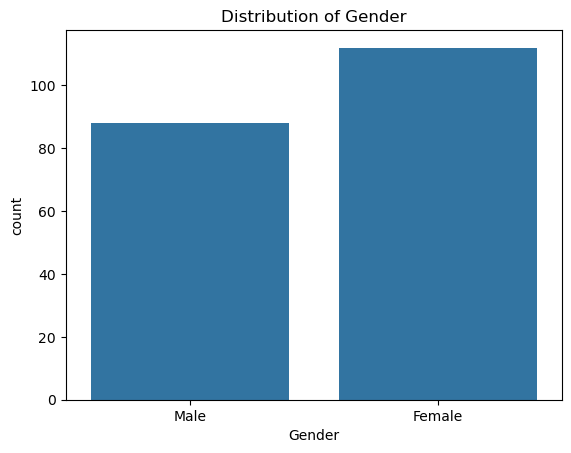

In [7]:
# Gender distribution

import seaborn as sns
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

 Gender distribution by age
    
</div>


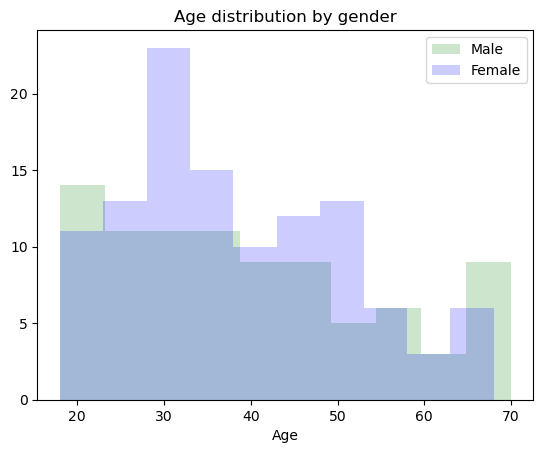

In [10]:


plt.hist('Age', data=df[df['Gender'] == 'Male'], alpha=0.2, color='g', label='Male')
plt.hist('Age', data=df[df['Gender'] == 'Female'], alpha=0.2, color='blue',label='Female')
plt.title('Age distribution by gender')
plt.xlabel('Age')
plt.legend()

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

 Age distribution by gender
    
</div>


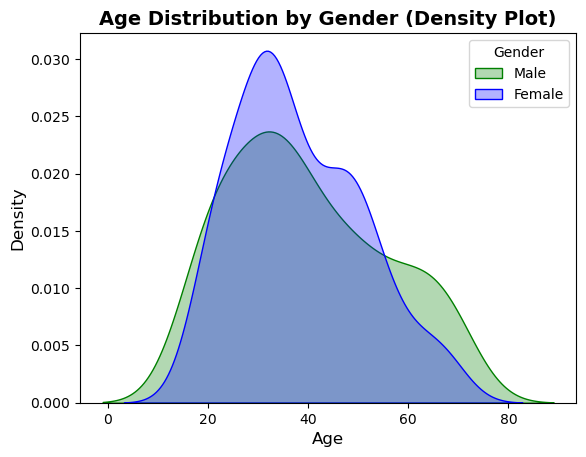

In [12]:

sns.kdeplot(data=df[df['Gender'] == 'Male']['Age'], 
            fill=True, color='green', label='Male', alpha=0.3)
sns.kdeplot(data=df[df['Gender'] == 'Female']['Age'], 
            fill=True, color='blue', label='Female', alpha=0.3)

# Add a descriptive title and axis labels
plt.title('Age Distribution by Gender (Density Plot)', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Add a legend
plt.legend(title="Gender", fontsize=10)


<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

 Boxplot Age - Gender
    
</div>

<Axes: xlabel='Gender', ylabel='Age'>

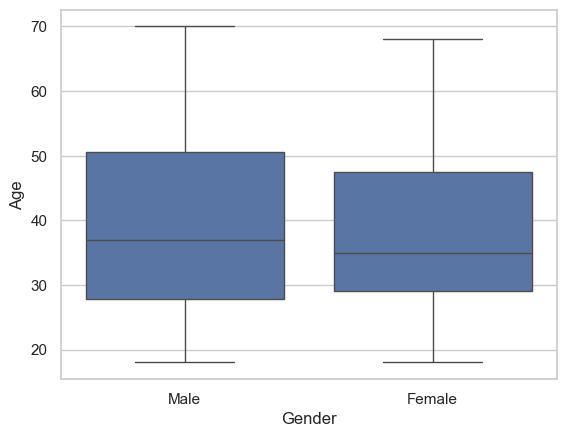

In [14]:
sns.set(style="whitegrid")
sns.boxplot(x="Gender", y="Age", data=df)

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

Bonxplot with 'Annual Income(k$)'
    
</div>

<Axes: xlabel='Gender', ylabel='Annual Income (k$)'>

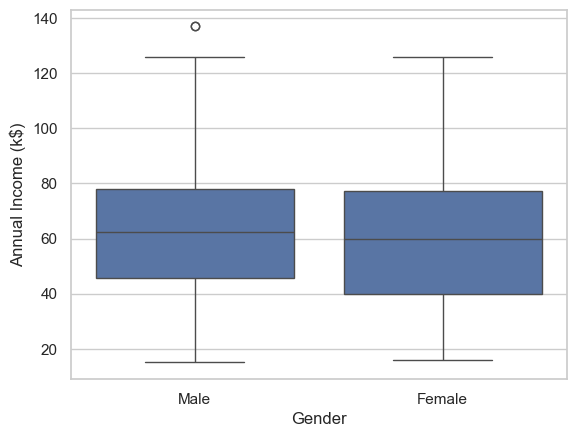

In [16]:
sns.set(style="whitegrid")
sns.boxplot(x="Gender", y="Annual Income (k$)", data=df)


<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

Boxplot with 'Spending Score (1-100)'
    
</div>

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

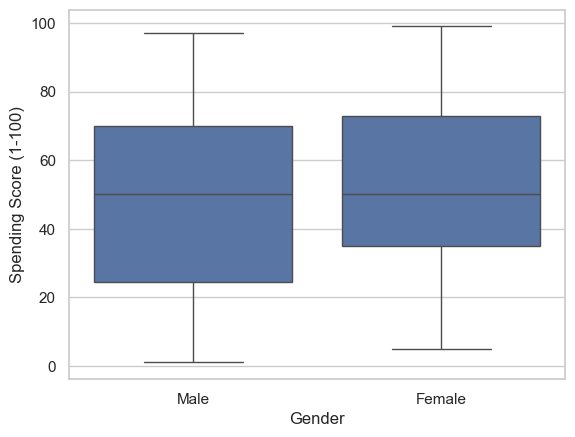

In [18]:
sns.set(style="whitegrid")
sns.boxplot(x="Gender", y="Spending Score (1-100)", data=df)

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

Variables correlation
    
</div>

In [20]:
# Let's check variables correlation
sns.heatmap(df.corr(), annot=True)

ValueError: could not convert string to float: 'Male'

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

Error! We have string data in our Dataframe. 
    
</div>

> * If the model you're using doesn't assume an ordinal relationship (like most modern ML models), use **One-Hot Encoding**.
>
> * If dimensionality is a concern or you're using algorithms like decision trees that are robust to ordinal values, **Label Encoding** is fine.

In [58]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True, dtype=int)

In [60]:
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


<Axes: >

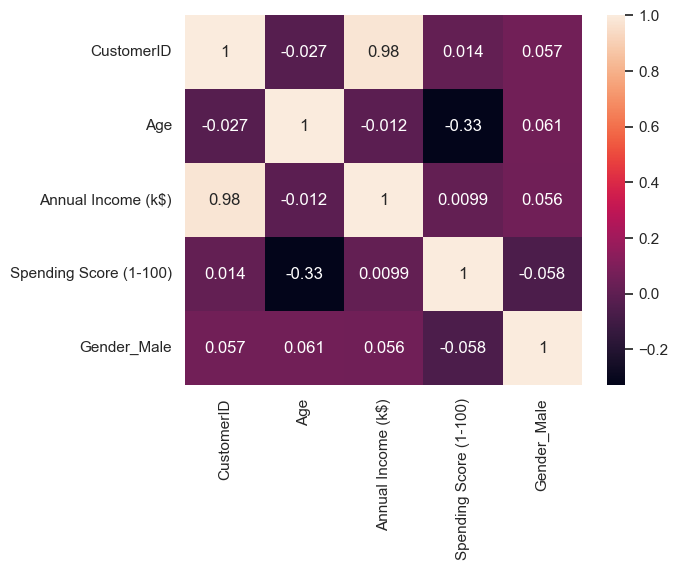

In [62]:
# Let's check variables correlation
sns.heatmap(df.corr(), annot=True)



<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

## Example 1. Hierarchical Clustering: groups of clients which are similar regarding Annual Income vs. Age
    
</div>

> * **Agglomerative Clustering** is a type of hierarchical clustering algorithm used to group similar data points together. It is a bottom-up approach, where each data point starts as its own individual cluster, and pairs of clusters are merged as we move up the hierarchy.

> Bottom-up Approach:
            > * Initially, each data point is treated as its own cluster.
            > * The algorithm iteratively merges the two closest clusters at each step.
            > * This process continues until all data points are merged into a single cluster or until a predefined number of clusters is reached.

> ``AgglomerativeClustering(n_clusters=5)``: Hierarchical clustering is performed, and the n_clusters argument specifies the number of clusters you want to identify. You can modify this number based on your analysis or the dendrogram.

> ``fit_predict()``: This method fits the model to the scaled data and assigns each data point to a cluster.

In [65]:

# create a subset/specific dataframe for this exercise
df_age_income = df[['Age', 'Annual Income (k$)']]

In [66]:
df_age_income

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

Scale the data and Apply Agglomerative clustering
    
</div>



In [68]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler


# Step 1: Scale the data
scaler = StandardScaler()
df_age_income_scaled = scaler.fit_transform(df_age_income)

# Step 2: Apply Agglomerative Clustering (Hierarchical Clustering)
agg_clustering = AgglomerativeClustering()  # You can adjust the number of clusters as needed -- n_clusters=2
y_hierarchical = agg_clustering.fit_predict(df_age_income_scaled)


In [69]:
y_hierarchical

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [70]:
df_age_income_scaled

array([[-1.42456879, -1.73899919],
       [-1.28103541, -1.73899919],
       [-1.3528021 , -1.70082976],
       [-1.13750203, -1.70082976],
       [-0.56336851, -1.66266033],
       [-1.20926872, -1.66266033],
       [-0.27630176, -1.62449091],
       [-1.13750203, -1.62449091],
       [ 1.80493225, -1.58632148],
       [-0.6351352 , -1.58632148],
       [ 2.02023231, -1.58632148],
       [-0.27630176, -1.58632148],
       [ 1.37433211, -1.54815205],
       [-1.06573534, -1.54815205],
       [-0.13276838, -1.54815205],
       [-1.20926872, -1.54815205],
       [-0.27630176, -1.50998262],
       [-1.3528021 , -1.50998262],
       [ 0.94373197, -1.43364376],
       [-0.27630176, -1.43364376],
       [-0.27630176, -1.39547433],
       [-0.99396865, -1.39547433],
       [ 0.51313183, -1.3573049 ],
       [-0.56336851, -1.3573049 ],
       [ 1.08726535, -1.24279661],
       [-0.70690189, -1.24279661],
       [ 0.44136514, -1.24279661],
       [-0.27630176, -1.24279661],
       [ 0.08253169,

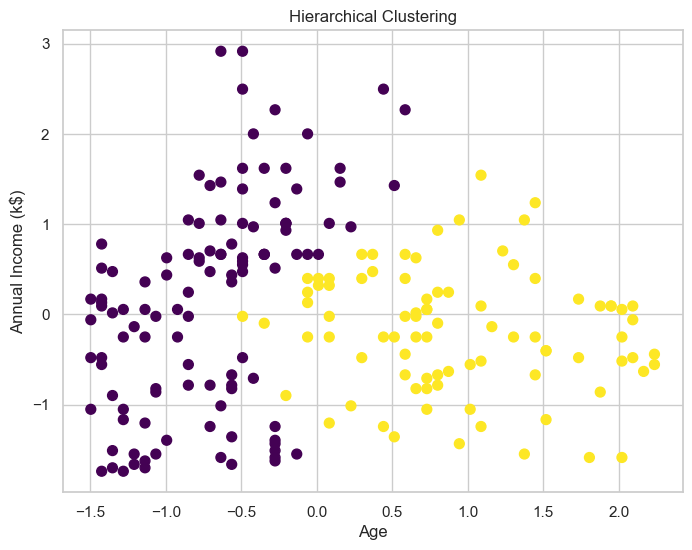

In [71]:
# Step 3: Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(df_age_income_scaled[:, 0], df_age_income_scaled[:, 1], c=y_hierarchical, cmap='viridis', s=50)
plt.title('Hierarchical Clustering')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()


<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

Plot the results with non-scale data to understand better the groups
    
</div>


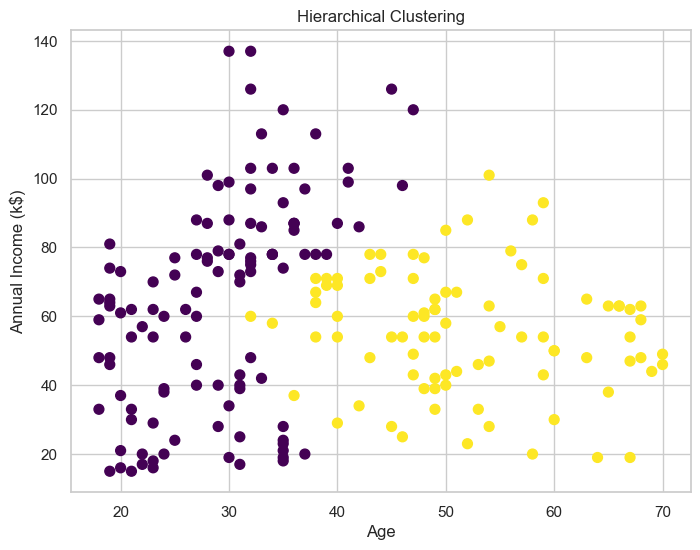

In [73]:

# Step 3: Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(df_age_income.loc[:, "Age"], df_age_income.loc[:, "Annual Income (k$)"], c=y_hierarchical, cmap='viridis', s=50)
plt.title('Hierarchical Clustering')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

Visualizing the Dendrogram
    
</div>

> The dendrogram helps to visualize how clusters are merged at each level, and the vertical distance between branches indicates how similar the clusters are.

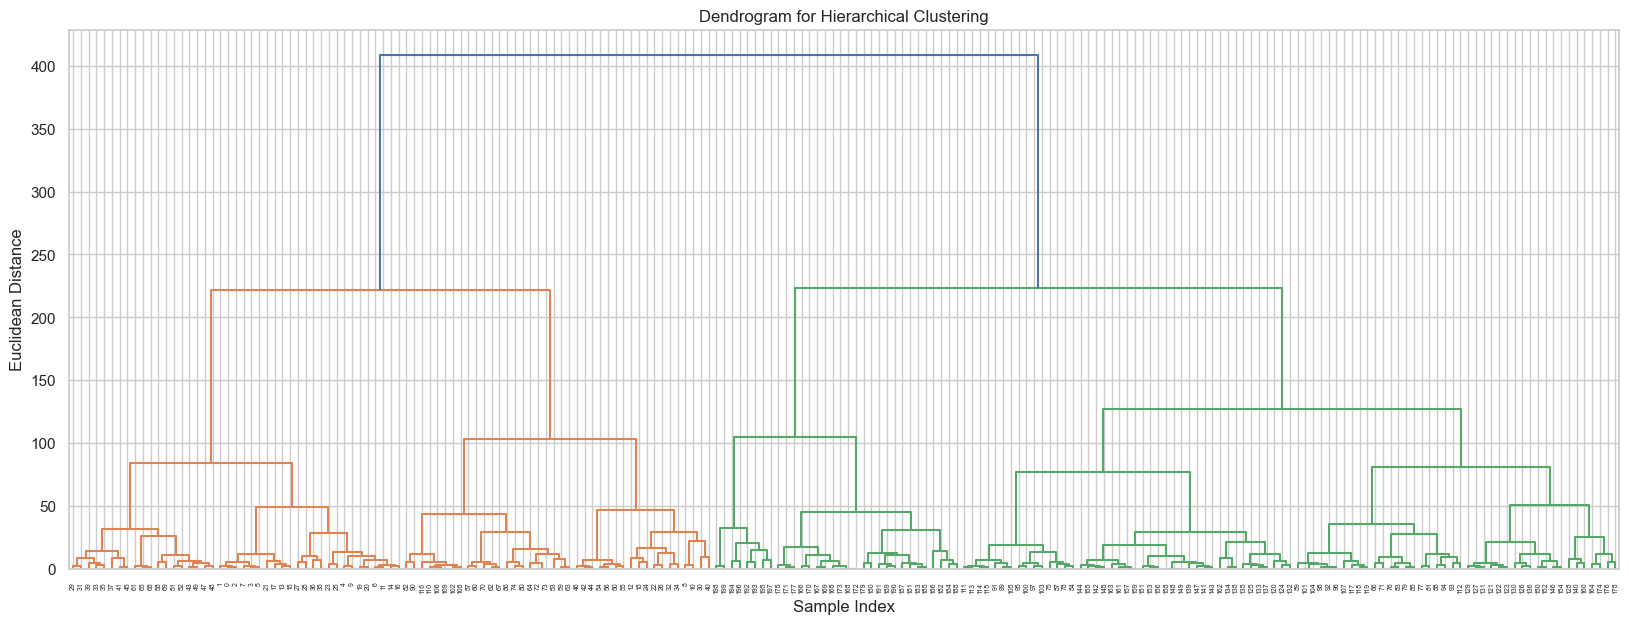

In [79]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 4: Create the linkage matrix for the dendrogram
linked = linkage(df_age_income, 'ward')

# Step 5: Plot the dendrogram
plt.figure(figsize=(20, 7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.show()



<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

## Example 2. K-means: Find K groups of clients which are similar regarding Spending Score vs. Age
    
</div>

> * To set the number of clusters we want to have as a result, we will use the **Elbow method**


Text(0.5, 1.0, 'Age to Spending Score')

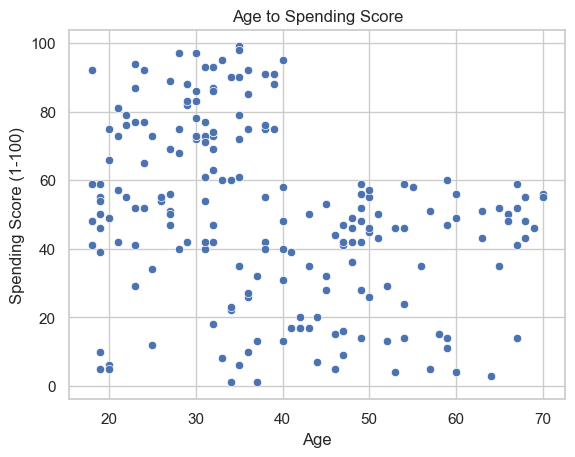

In [85]:
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df)
plt.title('Age to Spending Score')

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; font-weight: bold; margin-top: 25px;">

Elbow method
    
</div>

> * The Elbow Method is a commonly used technique in clustering analysis to determine the optimal number of clusters (k) in a dataset.
> * On the graph, the **x-axis** represents the **number of clusters (k)**, and the **y-axis** represents the within-cluster sum of squared errors **(WCSS)**.
> * The Elbow Method helps balance between:
    * Underfitting: Too few clusters (large WSS).
    * Overfitting: Too many clusters (small WSS but with less meaningful groupings).
> * By choosing the "elbow point," you aim for a model that captures the structure of the data efficiently without unnecessary complexity.

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

Scale the data
    
</div>

In [90]:
from sklearn.preprocessing import StandardScaler

# create a subset/specific dataframe for this exercise
df_age_spending = df[['Age', 'Spending Score (1-100)']]

# Scale the data
scaler = StandardScaler()
df_age_spending_scaled = scaler.fit_transform(df_age_spending)

In [92]:
df_age_spending_scaled

array([[-1.42456879, -0.43480148],
       [-1.28103541,  1.19570407],
       [-1.3528021 , -1.71591298],
       [-1.13750203,  1.04041783],
       [-0.56336851, -0.39597992],
       [-1.20926872,  1.00159627],
       [-0.27630176, -1.71591298],
       [-1.13750203,  1.70038436],
       [ 1.80493225, -1.83237767],
       [-0.6351352 ,  0.84631002],
       [ 2.02023231, -1.4053405 ],
       [-0.27630176,  1.89449216],
       [ 1.37433211, -1.36651894],
       [-1.06573534,  1.04041783],
       [-0.13276838, -1.44416206],
       [-1.20926872,  1.11806095],
       [-0.27630176, -0.59008772],
       [-1.3528021 ,  0.61338066],
       [ 0.94373197, -0.82301709],
       [-0.27630176,  1.8556706 ],
       [-0.27630176, -0.59008772],
       [-0.99396865,  0.88513158],
       [ 0.51313183, -1.75473454],
       [-0.56336851,  0.88513158],
       [ 1.08726535, -1.4053405 ],
       [-0.70690189,  1.23452563],
       [ 0.44136514, -0.7065524 ],
       [-0.27630176,  0.41927286],
       [ 0.08253169,

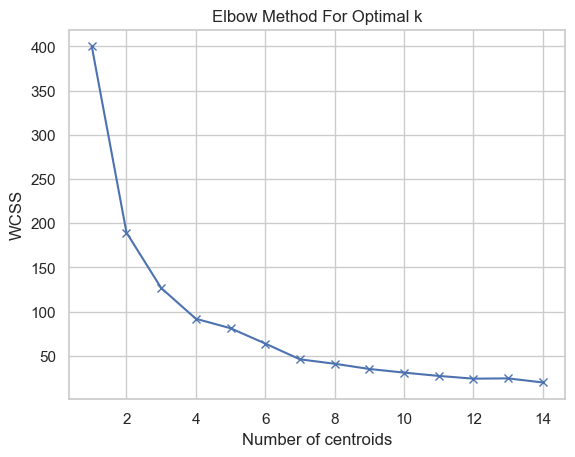

In [93]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


wcss = []
K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_age_spending_scaled)
    wcss.append(km.inertia_)
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

> * The elbow appears to occur at **k = 3**. After this point, the WCSS starts to decrease at a much slower rate, indicating that adding more clusters doesn't significantly improve the model's fit. Therefore, k = 3 is likely the optimal number of clusters for this dataset.

> * ``fit()``: Fits the k-means model to the data. This means that the k-means algorithm calculates the positions of the cluster centroids and assigns them to the data instances based on these positions.
> * ``predict()``: Assigns each data point to one of the clusters already calculated by the model. In other words, after the centroids of the clusters are calculated, the algorithm assigns each point to its closest centroid.




In [95]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_age_spending_scaled)
y_kmeans = kmeans.predict(df_age_spending_scaled)


In [96]:
y_kmeans

array([2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 1,
       2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 2, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 2, 2, 1, 0, 1, 0, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1,
       0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

Text(0, 0.5, 'Spending Score (1-100)')

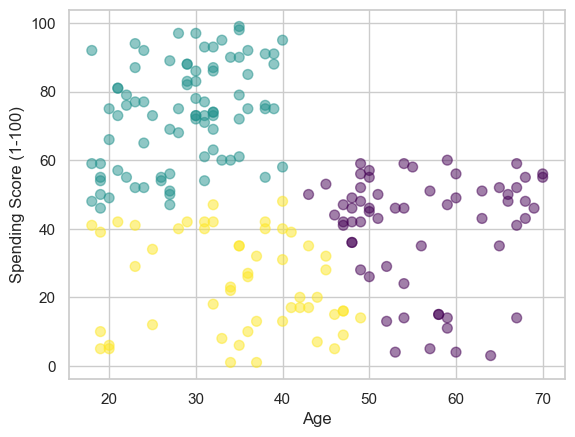

In [97]:

plt.scatter(df['Age'], df['Spending Score (1-100)'], c=y_kmeans, s=50, alpha=0.5,cmap='viridis')
centers = kmeans.cluster_centers_
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

#### Conclusions

Marketing target group could be as follows:

> * Group of young people with high spending.
> * Group of young people with low spending.
> * Older group of people with low and medium spend.




<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

## Example 3. K-means: Find K groups of clients which are similar regarding Spending Score vs Annual Income
    
</div>

> * To set the number of clusters we want to have as a result, we will use the **Elbow method**


**Which groups do you detect?**

Text(0.5, 1.0, 'Annual Income(k$) to Spending Score')

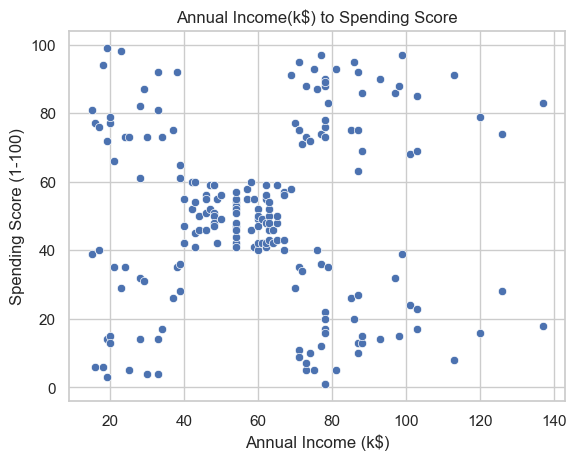

In [102]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Annual Income(k$) to Spending Score')

In [103]:
# create a subset/specific dataframe for this exercise
df_income_spending = df[['Annual Income (k$)', 'Spending Score (1-100)']]


# Scale the data
scaler = StandardScaler()
df_income_spending_scaled = scaler.fit_transform(df_income_spending)

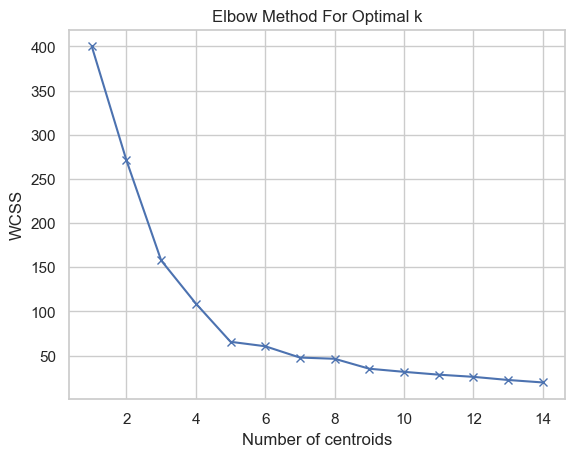

In [104]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import time

wcss = []
K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_income_spending_scaled)
    wcss.append(km.inertia_)
    


# Plot the Elbow
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()


In [107]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_income_spending_scaled)
y_kmeans = kmeans.predict(df_income_spending_scaled)

In [108]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

Text(0, 0.5, 'Spending Score (1-100)')

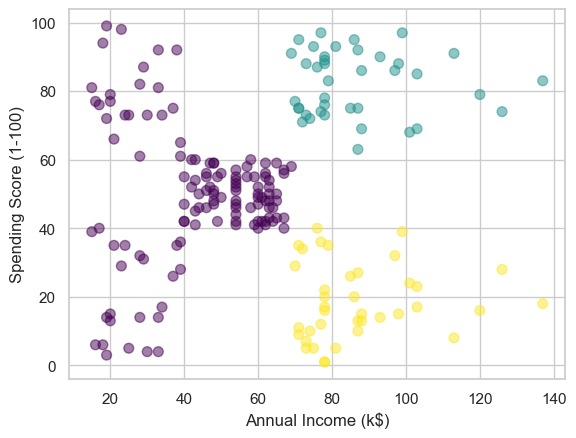

In [109]:

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=y_kmeans, s=50, alpha=0.5,cmap='viridis')
centers = kmeans.cluster_centers_
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

### Conclusions
> * Low income, high spending (Yellow cluster): These customers have low incomes but spend heavily, indicating strong engagement or discretionary spending habits.
> * Low income, low spending (Green cluster): Customers in this group have low incomes and spend minimally, likely budget-conscious shoppers.
> * Moderate income, moderate spending (Purple cluster): These customers have moderate incomes and spend moderately, likely representing the store’s core, regular customer base.
> * High income, low spending (dark blue cluster): Despite having high incomes, these customers spend less. The store may need to find ways to increase engagement or tailor marketing efforts for this group.
> * High income, high spending (Blue cluster): Have high incomes and spend heavily. 


<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

#  Dimensionality reduction with linear unsupervised method, Principal Component Analysis (PCA) 
    
</div>


> * Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction. It transforms a high-dimensional dataset into a lower-dimensional one by identifying the most important directions (called principal components) that capture the maximum variance in the data. This allows for a more efficient representation of the data while preserving its essential structure, making it easier to visualize and analyze.
> * In simpler terms, PCA reduces the number of variables in the data while retaining as much information as possible.


>
> * We use the overall dataset to cluster clients, considering all the information given

In [114]:
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [115]:
df = df.drop(columns=["CustomerID"])
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


## Dimension reduction: PCA

> * Reduce the dataset to 2 principal components that capture the maximum information of the original attributes.
> * By applying PCA, we transform the data into a 2D space, allowing us to visually observe the structure and grouping of the data points.

In [117]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)  # Scaling the data


pca = PCA(n_components=2)
results_pca = pca.fit_transform(df)
print(results_pca)


[[-3.18699448e+01 -3.30012521e+01]
 [ 7.64494048e-01 -5.68429006e+01]
 [-5.74082757e+01 -1.31249607e+01]
 [-2.16854252e+00 -5.34785900e+01]
 [-3.21740846e+01 -3.03884119e+01]
 [-2.17695183e+00 -5.22272685e+01]
 [-5.90656895e+01 -9.54376302e+00]
 [ 1.23708622e+01 -6.16180208e+01]
 [-6.63157690e+01 -3.21423160e+00]
 [-5.65556212e+00 -4.72672225e+01]
 [-5.82365979e+01 -9.13418751e+00]
 [ 1.46218043e+01 -6.21075685e+01]
 [-5.51608374e+01 -1.00799251e+01]
 [-3.02878330e-03 -5.01140754e+01]
 [-5.27646657e+01 -1.16807468e+01]
 [ 1.94661180e+00 -5.15222086e+01]
 [-3.45055496e+01 -2.37615402e+01]
 [-7.30493262e+00 -4.35151138e+01]
 [-4.12573070e+01 -1.64734737e+01]
 [ 1.61902860e+01 -5.83001207e+01]
 [-3.27400141e+01 -2.13347966e+01]
 [-9.81885245e-01 -4.44524038e+01]
 [-5.78100898e+01 -1.87057486e+00]
 [-1.52712624e+00 -4.28582471e+01]
 [-5.04819556e+01 -3.56276971e+00]
 [ 7.69078091e+00 -4.58600560e+01]
 [-3.46329913e+01 -1.50715244e+01]
 [-9.94927953e+00 -3.30225018e+01]
 [-3.38854915e+01 -1

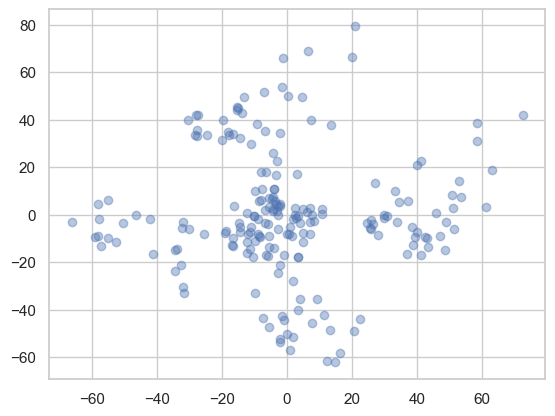

In [118]:

plt.scatter(results_pca[:, 0], results_pca[:, 1],alpha=0.4)
plt.show()

Calculate for this 2 features, the optimal number of clusters

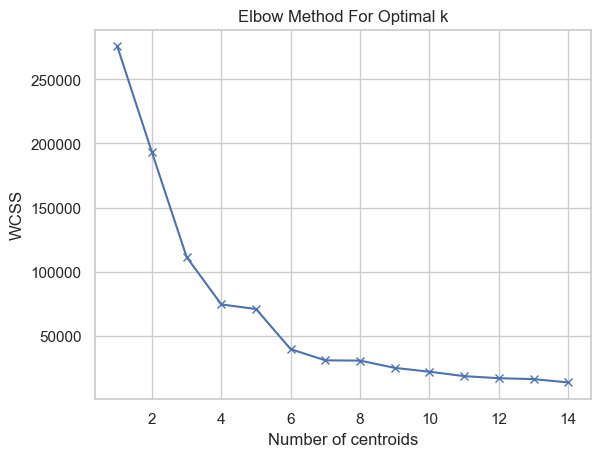

In [120]:
wcss = []
K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(results_pca)
    wcss.append(km.inertia_)
    
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

Text(0, 0.5, 'PC 2')

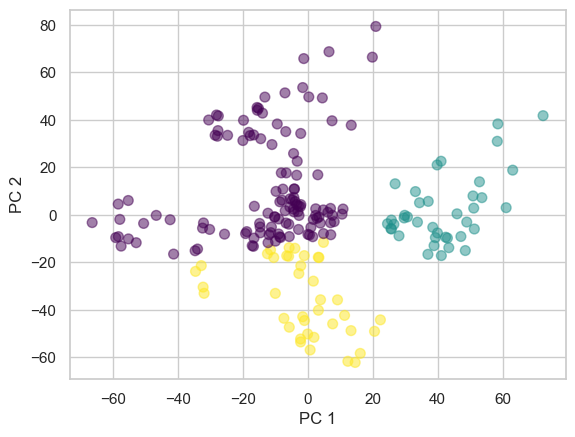

In [121]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(results_pca)
y_kmeans = kmeans.predict(results_pca)

plt.scatter(results_pca[:, 0], results_pca[:, 1], c=y_kmeans, s=50, alpha=0.5,cmap='viridis')
centers = kmeans.cluster_centers_
plt.xlabel('PC 1')
plt.ylabel('PC 2')

## Adding the resulting Clusters to the Original Data

> * **Clustering results in labels**: Through the clustering process, we have generated labels for each data point.
> * **Supervised learning with cluster labels**: These labels can now be used to train a supervised classification model. Unsupervised methods like clustering are essential for creating labels.
>  * **Predicting customer groups**: When a new customer arrives, we can predict which group they belong to based on their input data, without needing any prior study or manual grouping.


In [123]:
y_kmeans

array([2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [124]:
df_labels = df.copy()
df_labels['cluster'] = y_kmeans

In [125]:
df_labels.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,cluster
0,19,15,39,1,2
1,21,15,81,1,2
2,20,16,6,0,0
3,23,16,77,0,2
4,31,17,40,0,2




<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

 ## Plot Age vs Annual Income, coloring the data points for each Cluster
    
</div>

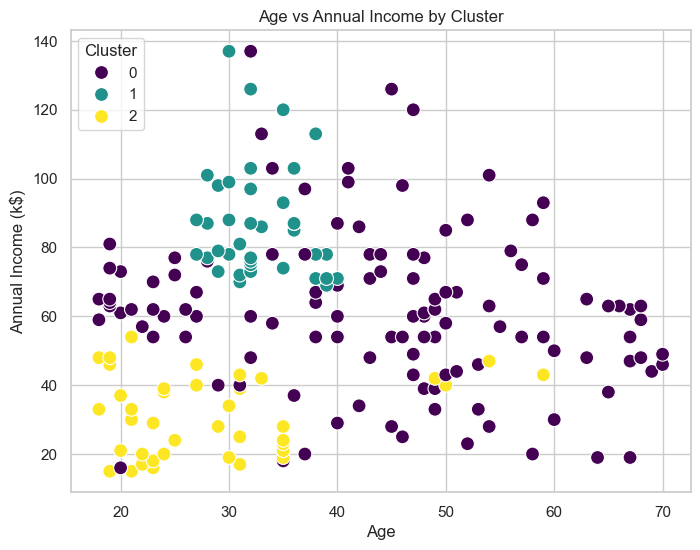

In [127]:
plt.figure(figsize=(8, 6))

# Scatter plot with color depending on the 'cluster' column
sns.scatterplot(data=df_labels, x='Age', y='Annual Income (k$)', hue='cluster', palette='viridis', s=100)

# Customize the plot
plt.title('Age vs Annual Income by Cluster')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend(title='Cluster', loc='upper left')

# Show plot
plt.show()



<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

 ## Plot Annual Income (k$) vs Spending Score, coloring the data points for each Cluster
    
</div>

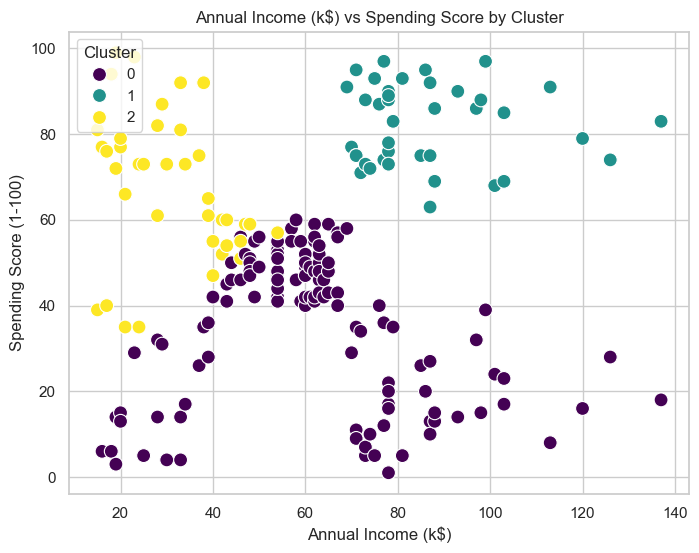

In [129]:
plt.figure(figsize=(8, 6))

# Scatter plot with color depending on the 'cluster' column
sns.scatterplot(data=df_labels, y='Spending Score (1-100)', x='Annual Income (k$)', hue='cluster', palette='viridis', s=100)

# Customize the plot
plt.title('Annual Income (k$) vs Spending Score by Cluster')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster', loc='upper left')

# Show plot
plt.show()



<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

 ## Plot Age vs Spending Score, coloring the data points for each Cluster
    
</div>

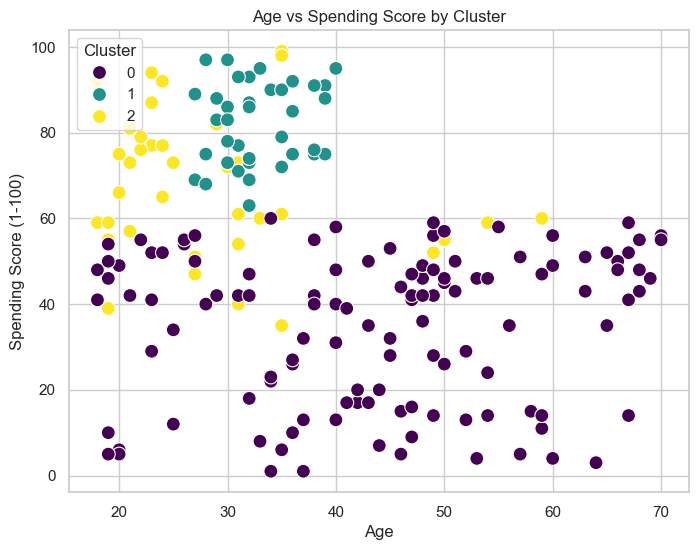

In [131]:
plt.figure(figsize=(8, 6))

# Scatter plot with color depending on the 'cluster' column
sns.scatterplot(data=df_labels, y='Spending Score (1-100)', x='Age', hue='cluster', palette='viridis', s=100)

# Customize the plot
plt.title('Age vs Spending Score by Cluster')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster', loc='upper left')

# Show plot
plt.show()